# Predicting Click-Through in Online Ranking

Hotel industry in context.

Aim: to applying machine learning techniques to maximize the click-through for the presented choices

Intro to problem: At the core of hotel personalization and ranking is the challenge of matching a set of hotels to a set of travelers whose tastes are heterogeneous and sometimes unobserved. The accuracy of the match depends on how online travel agencies (OTA) leverage their available information such as given hotel characteristics, location attractiveness of hotels, users aggregated purchase history and competitors’ information, and among others, to infer travelers preferences for hotels. For example, Hotels.com does this by compiling a customer’s search criteria to present the most competitive offerings for their needs at the top of the list of results when they make a travel query.

### Goal

applying machine learning techniques to maximize the click-through for the presented choices, where a click indicates a visitor’s interest and potentially a decision to book.

# 1)- Importing dependencies

In [0]:
import warnings
warnings.filterwarnings('ignore')
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

In [0]:
#For Visuals
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [3]:
df = pd.read_csv('file_clean.csv')
df.shape

(4497373, 55)

In [0]:
us=df

# Data Exploring

Our target variable is “click_bool”, rather than “booking_bool”. Because where there is a booking, there must be a click, and we want to optimize clicks.

In [5]:
us.booking_bool.value_counts()

0.0    4371888
1.0     125484
Name: booking_bool, dtype: int64

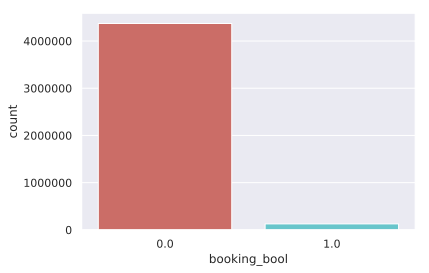

0.0    4371888
1.0     125484
Name: booking_bool, dtype: int64

In [6]:
sns.countplot(x='booking_bool',data=us, palette='hls')
plt.show();
us['booking_bool'].value_counts()

In [7]:
us.click_bool.value_counts()

0.0    4296159
1.0     201213
Name: click_bool, dtype: int64

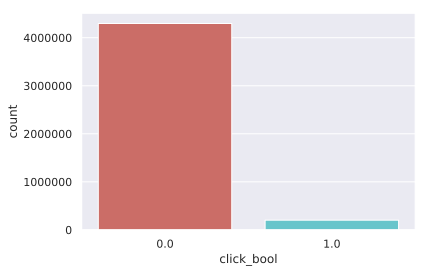

0.0    4296159
1.0     201213
Name: click_bool, dtype: int64

In [8]:
sns.countplot(x='click_bool',data=us, palette='hls')
plt.show();
us['click_bool'].value_counts()

Due to the nature of online travel business, both booking rate(2.8%) and click through rate (4.3%) are extremely low, the non-click impressions are overwhelming, the class are very imbalanced.

**length of stay**

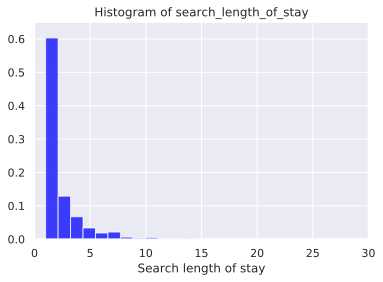

In [9]:
n, bins, patches = plt.hist(us.srch_length_of_stay, 50, density = 1, facecolor='blue', alpha=0.75)
plt.xlabel('Search length of stay')
plt.title('Histogram of search_length_of_stay')
plt.axis([0, 30, 0, 0.65])
plt.show();

In [10]:
us.groupby('srch_length_of_stay').size().nlargest(5)

srch_length_of_stay
1.0    1946337
2.0    1091043
3.0     649306
4.0     338086
5.0     168701
dtype: int64

The most searched length_of_stay is 1 day, then 2, 3, … Nothing outlier.

**Search adults feature**

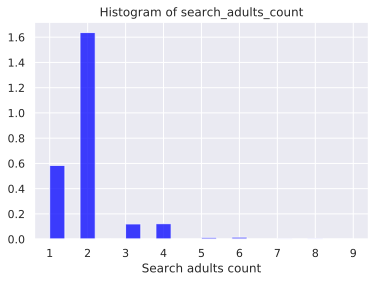

In [11]:
n, bins, patches = plt.hist(us.srch_adults_count, 20, density = 1, facecolor='blue', alpha=0.75)
plt.xlabel('Search adults count')
plt.title('Histogram of search_adults_count')
plt.show();

In [12]:
df.groupby('srch_adults_count').size().nlargest(5)

srch_adults_count
2.0    2943747
1.0    1050532
4.0     220024
3.0     216562
6.0      27674
dtype: int64

The most common search adults count is 2-adults, then 1-adult, makes sense.

**Property star rating**

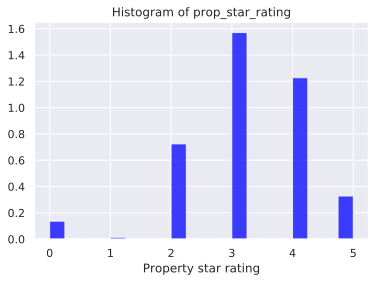

In [13]:
n, bins, patches = plt.hist(us.prop_starrating, 20, density = 1, facecolor='blue', alpha=0.75)
plt.xlabel('Property star rating')
plt.title('Histogram of prop_star_rating')
plt.show();

In [14]:
us.groupby('prop_starrating').size().nlargest()

prop_starrating
3.0    1765976
4.0    1379766
2.0     813787
5.0     368608
0.0     153441
dtype: int64

The most common searched property star rating is 3 stars. Good to know, I would have thought higher.

**Property feature**

In [15]:
us.groupby('prop_brand_bool').size()

prop_brand_bool
0.0    1642142
1.0    2855230
dtype: int64

In [16]:
us['prop_brand_bool'].value_counts(normalize=True)

1.0    0.634866
0.0    0.365134
Name: prop_brand_bool, dtype: float64

More than 63% of the properties are brand properties. It does make sense since we are talking about US hotels and US travelers.

**saturday night feature**

In [17]:
us.groupby('srch_saturday_night_bool').size()

srch_saturday_night_bool
0.0    2240634
1.0    2256738
dtype: int64

In [18]:
us['srch_saturday_night_bool'].value_counts(normalize=True)

1.0    0.50179
0.0    0.49821
Name: srch_saturday_night_bool, dtype: float64

Stay on Saturday is 50%. Almost same as not staying. Not much help here

**Price**

A numeric feature

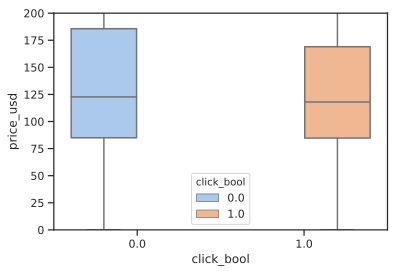

In [19]:
sns.set(style="ticks", palette="pastel")
ax = sns.boxplot(x="click_bool", y="price_usd", hue="click_bool", data=us)
ax.set_ylim([0, 200]);

In [20]:
us.groupby('click_bool')['price_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
click_bool,,,,,,,,
0.0,4296159.0,258.983172,16763.343026,0.0,85.00,122.7,185.66,19726328.0
1.0,201213.0,304.458873,17266.494015,0.0,84.72,118.0,169.00,3779565.0


On average, the price_usd that received a click is always lower than those of did not get a click.
Also there is huge difference in min and max of price click scanarios 

In [0]:
from datetime import datetime
def get_year(x):
    if x is not None and type(x) is not float:
        try:
            return datetime.strptime(x, '%Y-%m-%d').year
        except ValueError:
            return datetime.strptime(x, '%Y-%m-%d %H:%M:%S').year
    else:
        return 2013
    pass
def get_month(x):
    if x is not None and type(x) is not float:
        try:
            return datetime.strptime(x, '%Y-%m-%d').month
        except:
            return datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month
    else:
        return 1
    pass
    
def left_merge_dataset(left_dframe, right_dframe, merge_column):
    return pd.merge(left_dframe, right_dframe, on=merge_column, how='left')

In [0]:
df['date_time_year'] = pd.Series(df.date_time, index = df.index)
df['date_time_month'] = pd.Series(df.date_time, index = df.index)
from datetime import datetime
df.date_time_year = df.date_time_year.apply(lambda x: get_year(x))
df.date_time_month = df.date_time_month.apply(lambda x: get_month(x))
del df['date_time']

In [23]:
df['date_time_year'][:5]

0    2013
1    2013
2    2013
3    2013
4    2013
Name: date_time_year, dtype: int64

In [0]:
data_year=df['date_time_year'].sort_values()

In [0]:
j=df.groupby(data_year)['click_bool'].value_counts()

In [26]:
j[:5]

date_time_year  click_bool
2012            0.0            847729
                1.0             39492
2013            0.0           3448430
                1.0            161721
Name: click_bool, dtype: int64

In [27]:
j=j.unstack('click_bool')
j[:5]

click_bool,0.0,1.0
date_time_year,,
2012,847729,39492
2013,3448430,161721


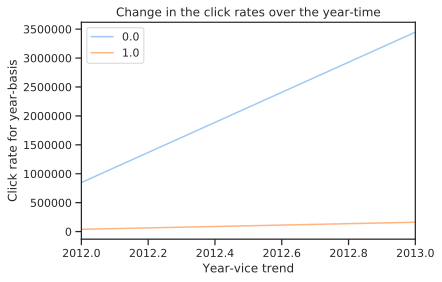

In [28]:
j.plot()
plt.xlabel('Year-vice trend')
plt.ylabel('Click rate for year-basis')
plt.title('Change in the click rates over the year-time')
plt.legend()
plt.show()

In [0]:
data_month=df['date_time_month'].sort_values()

In [0]:
k=df.groupby(data_month)['click_bool'].value_counts()

In [31]:
k[:5]

date_time_month  click_bool
1                0.0           525578
                 1.0            24028
2                0.0           515655
                 1.0            23899
3                0.0           608086
Name: click_bool, dtype: int64

In [32]:
k=k.unstack('click_bool')
k[:5]

click_bool,0.0,1.0
date_time_month,,
1,525578,24028
2,515655,23899
3,608086,28485
4,556035,26222
5,605316,28985


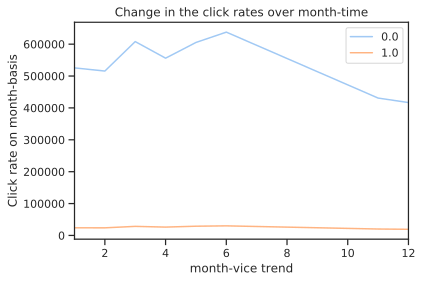

In [33]:
k.plot()
plt.xlabel('month-vice trend')
plt.ylabel('Click rate on month-basis')
plt.title('Change in the click rates over month-time')
plt.legend()
plt.show()